## 作業目標:
### 利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

## 作業重點:
### 請新增兩層MLP與三層MLP看看最後預測結果與一層的MLP是否有差異
### 請詳細說明修改的程式碼位置與你覺得為什麼會有差異?
### 請注意!!! 每一個block code都一定要在自己本機執行過後再上傳到雲端學院與github
### 請注意!!! ipynb檔名:Pytorch_Mnist_MLP_HW_學號.ipynb
### 參考程式: https://github.com/iam-mhaseeb/Multi-Layer-Perceptron-MNIST-with-PyTorch/blob/master/mnist_mlp_exercise.ipynb

## 匯入所需packet

In [1]:
# import libraries
import torch
import numpy as np

## 設定參數&匯入檔案

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

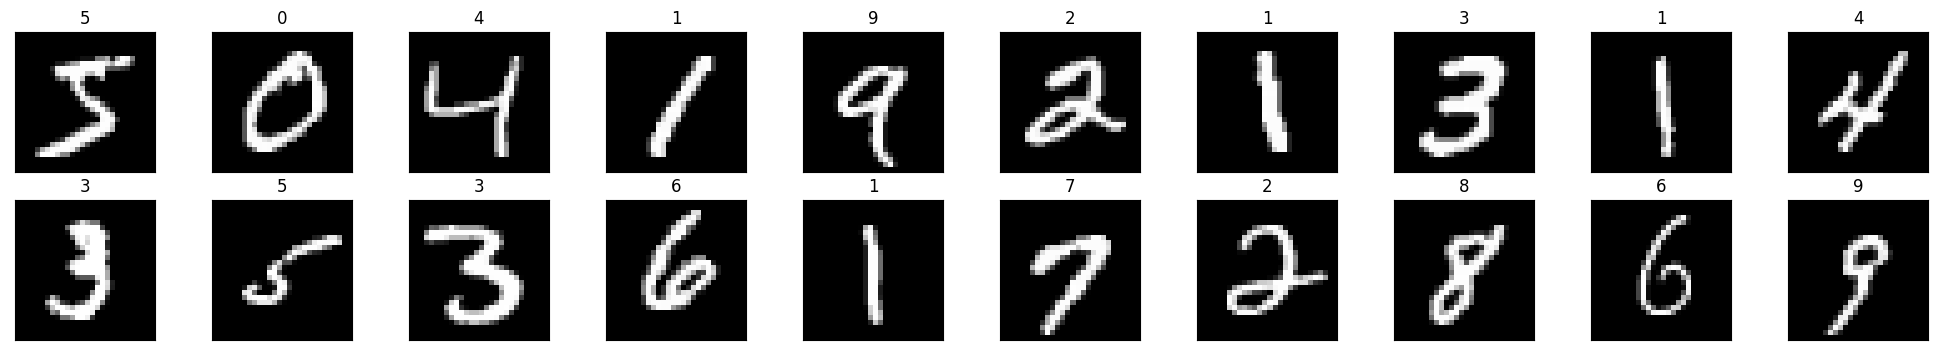

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.__next__()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

## Model 1

### Define the Network Architecture

In [17]:
import torch.nn as nn
import torch.nn.functional as F

## Define the NN architecture
class Net1(nn.Module): # 1層MLP
    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 10)
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x)) # 第一個全連接層, 並用ReLU激活
        return x
    
# initialize the NN
model1 = Net1()
print(model1)

Net1(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


### Define loss function and optimizer

In [18]:
## Specify loss and optimization functions
# specify loss function
criterion1 = nn.CrossEntropyLoss()
# specify optimizer
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.01)

### Training

In [19]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

model1.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer1.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output2 = model1(data)
        # calculate the loss
        loss = criterion1(output2, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer1.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.691441
Epoch: 2 	Training Loss: 0.409242
Epoch: 3 	Training Loss: 0.367806
Epoch: 4 	Training Loss: 0.346848
Epoch: 5 	Training Loss: 0.333484
Epoch: 6 	Training Loss: 0.323969
Epoch: 7 	Training Loss: 0.316725
Epoch: 8 	Training Loss: 0.310946
Epoch: 9 	Training Loss: 0.306193
Epoch: 10 	Training Loss: 0.302186


### Testing

In [20]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model1.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output1 = model1(data)
    # calculate the loss
    loss = criterion1(output1, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output1, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.291435

Test Accuracy of     0: 98% (964/980)
Test Accuracy of     1: 97% (1106/1135)
Test Accuracy of     2: 87% (905/1032)
Test Accuracy of     3: 90% (913/1010)
Test Accuracy of     4: 92% (910/982)
Test Accuracy of     5: 87% (777/892)
Test Accuracy of     6: 94% (908/958)
Test Accuracy of     7: 91% (938/1028)
Test Accuracy of     8: 88% (858/974)
Test Accuracy of     9: 90% (914/1009)

Test Accuracy (Overall): 91% (9193/10000)


## Model 2

### Define the Network Architecture

In [9]:
class Net2(nn.Module): # 2層MLP
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x)) # 第一個全連接層, 並用ReLU激活
        x = F.relu(self.fc2(x)) # 第二個全連接層, 並用ReLU激活
        return x
model2 = Net2()
print(model2)

Net2(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


### Define loss function and optimizer

In [10]:
criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.01)

### Training

In [11]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

model2.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer2.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output2 = model2(data)
        # calculate the loss
        loss = criterion2(output2, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer2.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.705207
Epoch: 2 	Training Loss: 0.321585
Epoch: 3 	Training Loss: 0.272441
Epoch: 4 	Training Loss: 0.238878
Epoch: 5 	Training Loss: 0.212521
Epoch: 6 	Training Loss: 0.190919
Epoch: 7 	Training Loss: 0.172962
Epoch: 8 	Training Loss: 0.157884
Epoch: 9 	Training Loss: 0.145063
Epoch: 10 	Training Loss: 0.134086


### Testing

In [12]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model2.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output2 = model2(data)
    # calculate the loss
    loss = criterion2(output2, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output2, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.135077

Test Accuracy of     0: 98% (968/980)
Test Accuracy of     1: 98% (1119/1135)
Test Accuracy of     2: 95% (990/1032)
Test Accuracy of     3: 96% (973/1010)
Test Accuracy of     4: 95% (941/982)
Test Accuracy of     5: 96% (860/892)
Test Accuracy of     6: 96% (920/958)
Test Accuracy of     7: 94% (971/1028)
Test Accuracy of     8: 94% (919/974)
Test Accuracy of     9: 94% (954/1009)

Test Accuracy (Overall): 96% (9615/10000)


## Model 3

### Define the Network Architecture

In [13]:
class Net3(nn.Module): # 3層MLP
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x)) # 第一個全連接層, 並用ReLU激活
        x = F.relu(self.fc2(x)) # 第二個全連接層, 並用ReLU激活
        x = F.relu(self.fc3(x)) # 第三個全連接層, 並用ReLU激活
        return x
model3 = Net3()  
print(model3) 

Net3(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


### Define loss function and optimizer

In [14]:
criterion3 = nn.CrossEntropyLoss()
optimizer3 = torch.optim.SGD(model3.parameters(), lr=0.01)

### Training

In [15]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

model3.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer3.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output3 = model3(data)
        # calculate the loss
        loss = criterion3(output3, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer3.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.886851
Epoch: 2 	Training Loss: 0.295639
Epoch: 3 	Training Loss: 0.232584
Epoch: 4 	Training Loss: 0.189798
Epoch: 5 	Training Loss: 0.159052
Epoch: 6 	Training Loss: 0.135971
Epoch: 7 	Training Loss: 0.118065
Epoch: 8 	Training Loss: 0.103736
Epoch: 9 	Training Loss: 0.092015
Epoch: 10 	Training Loss: 0.082210


### Testing

In [16]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model3.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output3 = model3(data)
    # calculate the loss
    loss = criterion3(output3, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output3, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.094080

Test Accuracy of     0: 98% (969/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 97% (1005/1032)
Test Accuracy of     3: 97% (983/1010)
Test Accuracy of     4: 96% (951/982)
Test Accuracy of     5: 98% (875/892)
Test Accuracy of     6: 96% (921/958)
Test Accuracy of     7: 95% (981/1028)
Test Accuracy of     8: 96% (940/974)
Test Accuracy of     9: 96% (973/1009)

Test Accuracy (Overall): 97% (9723/10000)
